# **Advanced Data Science 1st Homework**

*   Sepehr Ghaseminejad
*   Dataset: [Google Play App Store](https://www.kaggle.com/datasets/lava18/google-play-store-apps/data)




## **0. Reading the Dataset from Kaggle:**

---



In [57]:
import kagglehub
import shutil
import os

# Download the dataset
path = kagglehub.dataset_download("lava18/google-play-store-apps")
print("Original download path:", path)

# Get current working directory (where your notebook is)
current_dir = os.getcwd()
print("Current working directory:", current_dir)

# Copy all files from download path to current directory
for item in os.listdir(path):
    source = os.path.join(path, item)
    destination = os.path.join(current_dir, item)

    if os.path.isdir(source):
        shutil.copytree(source, destination, dirs_exist_ok=True)
    else:
        shutil.copy2(source, destination)

print("Dataset copied to current directory!")

# Verify files are in current directory
print("\nFiles in current directory:")
for file in os.listdir('.'):
    print(f" - {file}")

Using Colab cache for faster access to the 'google-play-store-apps' dataset.
Original download path: /kaggle/input/google-play-store-apps
Current working directory: /content
Dataset copied to current directory!

Files in current directory:
 - .config
 - googleplaystore_user_reviews.csv
 - googleplaystore.csv
 - license.txt
 - sample_data


In [58]:
import pandas as pd

df = pd.read_csv('/content/googleplaystore.csv')

print("\n### DataFrame Info:")
print(df.info())

print("\n### Descriptive Statistics:")
print(df.describe())

df.head()



### DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

### Descriptive Statistics:
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.0

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## **1.1 Data Cleaning**
---

Let's search for abnormal values:





In [59]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

Having the value 'Free' for the **Installs** column does not make sense!

In [60]:
df[df['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


It is likely that the category field is missing in this row and the other values have shifted one column to the left. By checking the **Google Play Store**, this app refers to the **Family** category! Hence, we correct the columns:

In [61]:
df.loc[10472] = ['Life Made WI-Fi Touchscreen Photo Frame', 'PHOTOGRAPHY', 1.9, '19.0', '3.0M', '1,000+', 'Free', '0', 'Everyone', 'Photography', 'February 11, 2018', '1.0.19', '4.0 and up']
df.loc[10472]

,10472
App,Life Made WI-Fi Touchscreen Photo Frame
Category,PHOTOGRAPHY
Rating,1.9
Reviews,19.0
Size,3.0M
Installs,"1,000+"
Type,Free
Price,0
Content Rating,Everyone
Genres,Photography


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Since the **Rating** is a pivotal column in this dataset, I prefer to delete the null rows, rather than filling it with some inaccurate values like mean, median, etc.

In [65]:
df.dropna(subset=['Rating'], inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8893 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8893 non-null   object 
 1   Category        8893 non-null   object 
 2   Rating          8893 non-null   float64
 3   Reviews         8893 non-null   object 
 4   Size            8893 non-null   object 
 5   Installs        8893 non-null   object 
 6   Type            8893 non-null   object 
 7   Price           8893 non-null   object 
 8   Content Rating  8893 non-null   object 
 9   Genres          8893 non-null   object 
 10  Last Updated    8893 non-null   object 
 11  Current Ver     8889 non-null   object 
 12  Android Ver     8891 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.7+ KB


In [67]:
df.dropna(subset=['Current Ver', 'Android Ver'], inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8887 non-null   object 
 1   Category        8887 non-null   object 
 2   Rating          8887 non-null   float64
 3   Reviews         8887 non-null   object 
 4   Size            8887 non-null   object 
 5   Installs        8887 non-null   object 
 6   Type            8887 non-null   object 
 7   Price           8887 non-null   object 
 8   Content Rating  8887 non-null   object 
 9   Genres          8887 non-null   object 
 10  Last Updated    8887 non-null   object 
 11  Current Ver     8887 non-null   object 
 12  Android Ver     8887 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.0+ KB


### **Check for Inconsistency Across Dataset:**

In [69]:
Wrong_Paid = df[(df['Type'] == 'Paid') & (df['Price'] == 0)]
Wrong_Free = df[(df['Type'] == 'Free') & (df['Price'] != 0)]

print("Number of applications with Paid type but Price = 0: ", Wrong_Paid.count())
print("Number of applications with Free type but Price > 0: ", Wrong_Free.count())

Number of applications with Paid type but Price = 0:  App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
Number of applications with Free type but Price > 0:  App               8276
Category          8276
Rating            8276
Reviews           8276
Size              8276
Installs          8276
Type              8276
Price             8276
Content Rating    8276
Genres            8276
Last Updated      8276
Current Ver       8276
Android Ver       8276
dtype: int64


In [70]:
df[(df['Rating'] > 5) | (df['Rating'] < 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [74]:
df[df['Reviews'] < 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## **1.2 Preprocessing:** Correcting Data Types

---



In [73]:
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'])

df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Reviews'] = df['Reviews'].astype(int)

df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'])

df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [75]:
df[df['Size'].str.contains('[k|M|Varies]', na=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


According to the result above, the Size column includes numerics + [k or M] or "Varies with device". Therefore, we are going to remove the alphabets:

In [76]:
def clean_size(size):
    # If the value is already numeric (float or int) and not NaN, return it as is.
    # This makes the function idempotent for already processed numeric values.
    if isinstance(size, (int, float)) and not pd.isna(size):
        return size

    if 'M' in str(size):
        return float(str(size).replace('M', ''))
    elif 'k' in str(size):
        return float(str(size).replace('k', '')) / 1024 # Convert KB to MB
    elif 'Varies with device' in str(size):
        return None
    return None

df['Size'] = df['Size'].apply(clean_size)

# Fill missing 'Size' values with the median
median_size = df['Size'].median()
df['Size'] = df['Size'].fillna(median_size)

In [77]:
print(df['Size'].median())

14.0


In [78]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8887 non-null   object        
 1   Category        8887 non-null   object        
 2   Rating          8887 non-null   float64       
 3   Reviews         8887 non-null   int64         
 4   Size            8887 non-null   float64       
 5   Installs        8887 non-null   int64         
 6   Type            8887 non-null   object        
 7   Price           8887 non-null   float64       
 8   Content Rating  8887 non-null   object        
 9   Genres          8887 non-null   object        
 10  Last Updated    8887 non-null   datetime64[ns]
 11  Current Ver     8887 non-null   object        
 12  Android Ver     8887 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 972.0+ KB


In [80]:
len(df["Genres"].unique())

115

In [81]:
df["Genres"].head(10)

,Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design
3,Art & Design
4,Art & Design;Creativity
5,Art & Design
6,Art & Design
7,Art & Design
8,Art & Design
9,Art & Design;Creativity


Let's remove the sub-genre from the Genre column:

In [82]:
df["Genres"] = df["Genres"].str.split(";").str[0]

In [83]:
len(df["Genres"].unique())

48

In [84]:
df["Genres"].value_counts()

,count
Genres,
Tools,733
Entertainment,538
Education,528
Action,364
Productivity,334
Finance,317
Personalization,308
Communication,308
Lifestyle,306


In [85]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

/tmp/ipython-input-1960428077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Genres"].replace("Music & Audio", "Music", inplace =True)


## Converting Categorical columns into Numerical (Boolean)

---

Since it massively changes the dataset's shape, I use a new dataframe called df_encoded to store it:

In [86]:
# Identify categorical columns for one-hot encoding
categorical_cols = ['Category', 'Type', 'Content Rating', 'Genres']

# Apply one-hot encoding into a newly created DataFrame
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False) # drop_first=False to retain all categories

print("DataFrame info after one-hot encoding:\n")
print(df_encoded.info())
df_encoded.head()

DataFrame info after one-hot encoding:

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 0 to 10840
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   App                             8887 non-null   object        
 1   Rating                          8887 non-null   float64       
 2   Reviews                         8887 non-null   int64         
 3   Size                            8887 non-null   float64       
 4   Installs                        8887 non-null   int64         
 5   Price                           8887 non-null   float64       
 6   Last Updated                    8887 non-null   datetime64[ns]
 7   Current Ver                     8887 non-null   object        
 8   Android Ver                     8887 non-null   object        
 9   Category_ART_AND_DESIGN         8887 non-null   bool          
 10  Category_AUTO_AND_VEHICLES      8887

,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Android Ver,Category_ART_AND_DESIGN,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,2018-01-07,1.0.0,4.0.3 and up,True,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,3.9,967,14.0,500000,0.0,2018-01-15,2.0.0,4.0.3 and up,True,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0.0,2018-08-01,1.2.4,4.0.3 and up,True,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,2018-06-08,Varies with device,4.2 and up,True,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,2018-06-20,1.1,4.4 and up,True,...,False,False,False,False,False,False,False,False,False,False


## **1.3 Normalization for numerical columns**

---



In [89]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for normalization
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

scaler = StandardScaler()

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head()

,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Android Ver,Category_ART_AND_DESIGN,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.167710,-0.162743,-0.106702,-0.190854,-0.059496,2018-01-07,1.0.0,4.0.3 and up,True,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,-0.550169,-0.162465,-0.337542,-0.185182,-0.059496,2018-01-15,2.0.0,4.0.3 and up,True,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.979665,-0.132681,-0.582233,-0.133096,-0.059496,2018-08-01,1.2.4,4.0.3 and up,True,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,0.597207,-0.088583,0.170307,0.387770,-0.059496,2018-06-08,Varies with device,4.2 and up,True,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,0.214748,-0.162465,-0.854625,-0.189812,-0.059496,2018-06-20,1.1,4.4 and up,True,...,False,False,False,False,False,False,False,False,False,False


## **2. Data Visualization**

---



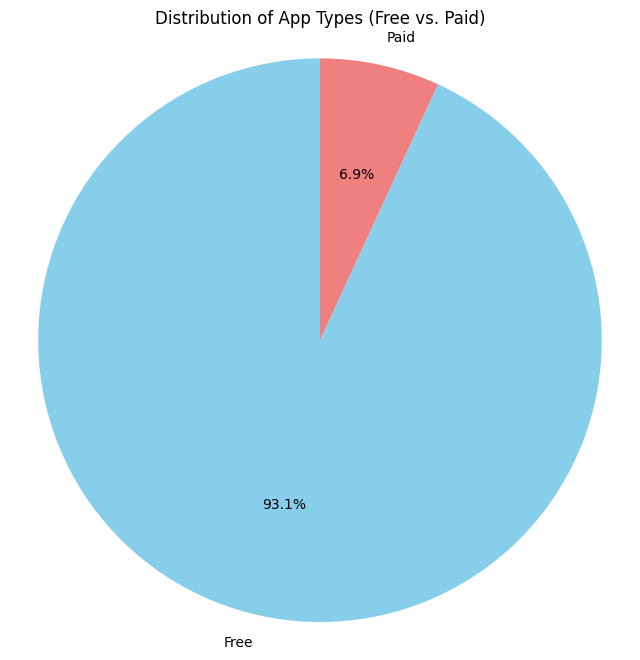

In [87]:
import matplotlib.pyplot as plt

type_counts = pd.Series({
    'Free': df_encoded['Type_Free'].sum(),
    'Paid': df_encoded['Type_Paid'].sum()
})

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of App Types (Free vs. Paid)')
plt.axis('equal')
plt.show()

/tmp/ipython-input-1103191466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')


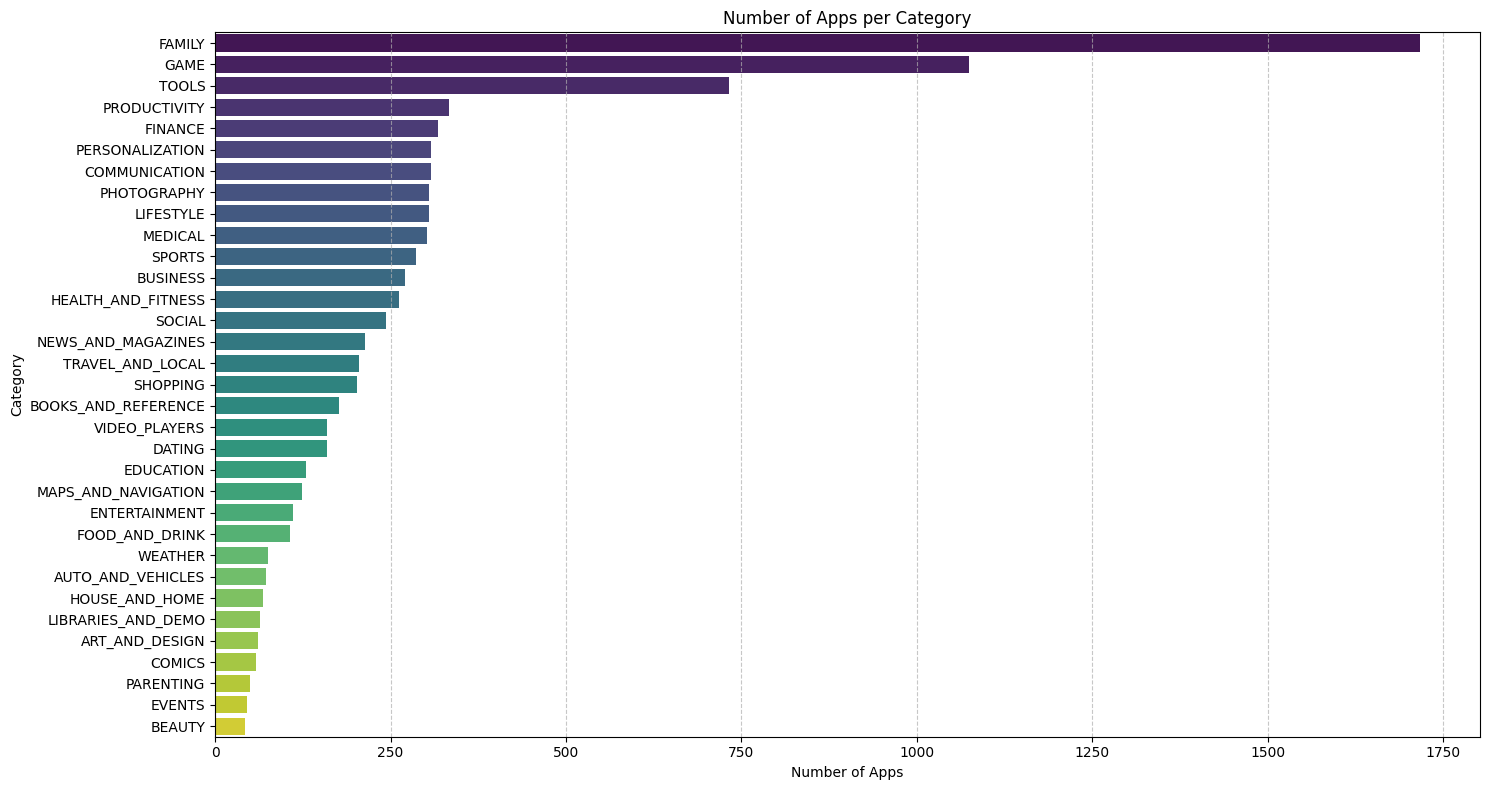

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

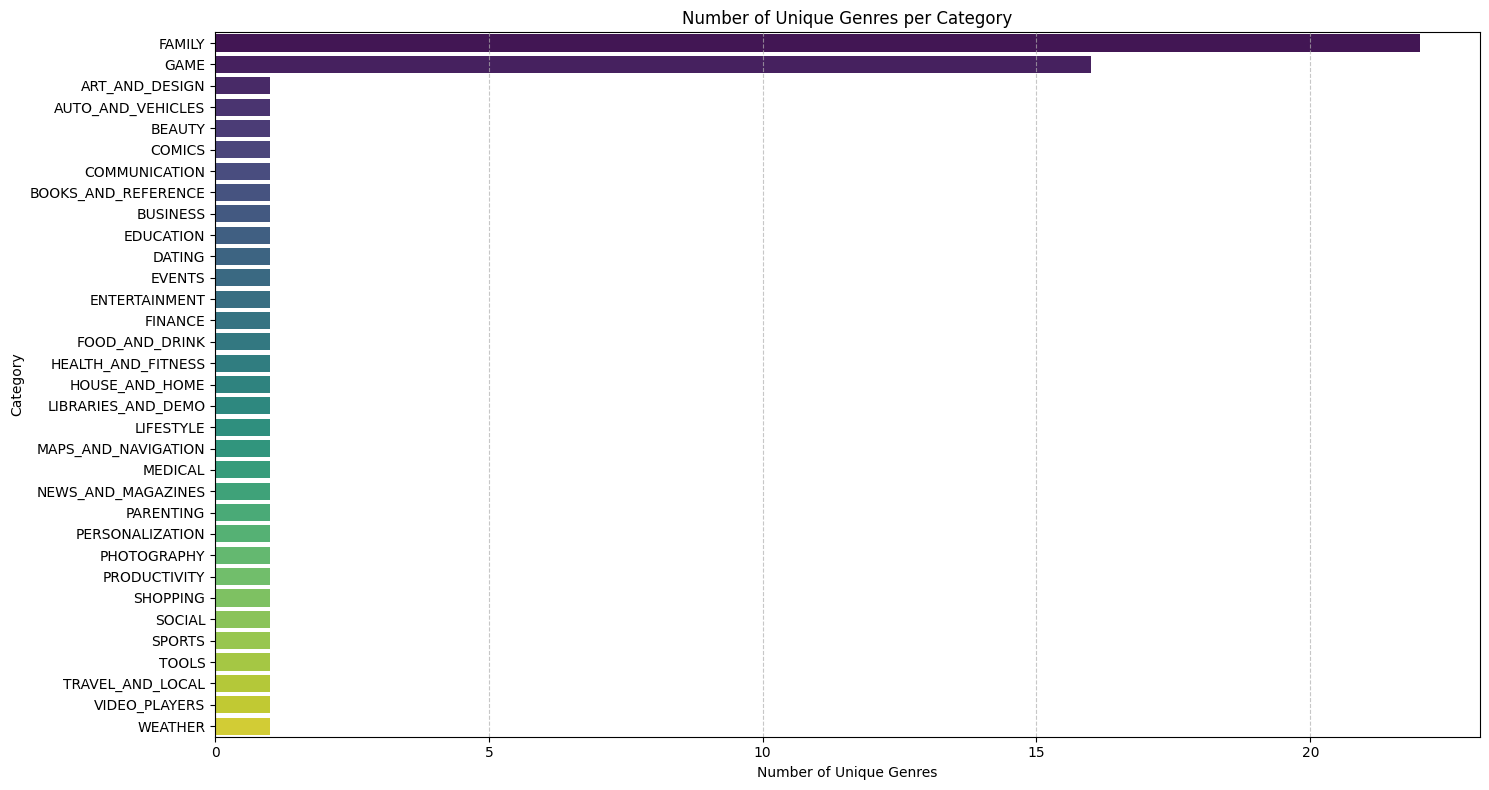

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

Genres_counts = df.groupby('Category')['Genres'].nunique()

Genres_counts = Genres_counts.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=Genres_counts.values, y=Genres_counts.index, hue=Genres_counts.index, palette='viridis', legend=False)
plt.title('Number of Unique Genres per Category')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

According to the plot above, the Genre column makes sense only for the FAMILY and GAME categories!

Text(0.5, 1.0, 'Content rating with their counts')

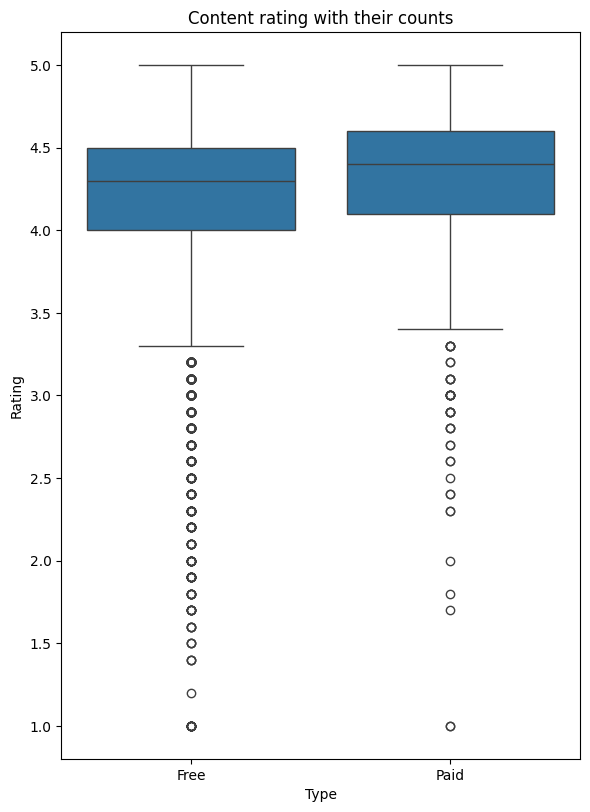

In [103]:
plt.figure(figsize=(6, 8))
sns.boxplot(x = "Type", y = "Rating", data = df)
plt.tight_layout()
plt.title("Content rating with their counts")

The **paid** apps have better ratings!

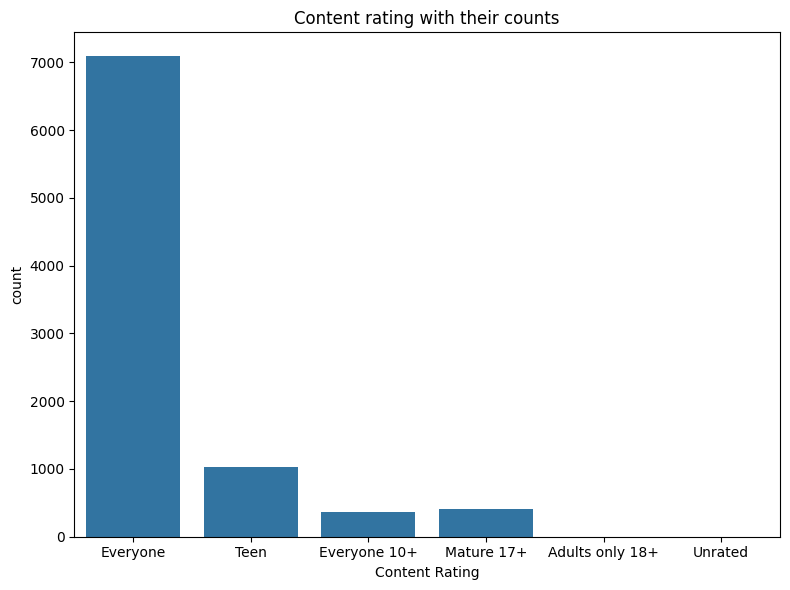

In [105]:
plt.figure(figsize=(8, 6))
sns.countplot(x= "Content Rating", data = df)
plt.title("Content rating with their counts")
plt.tight_layout()
plt.show()

/tmp/ipython-input-57980730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Content Rating", y="Rating", data=df, palette='viridis', linewidth=1.5, medianprops={'color': 'red', 'linewidth': 2})


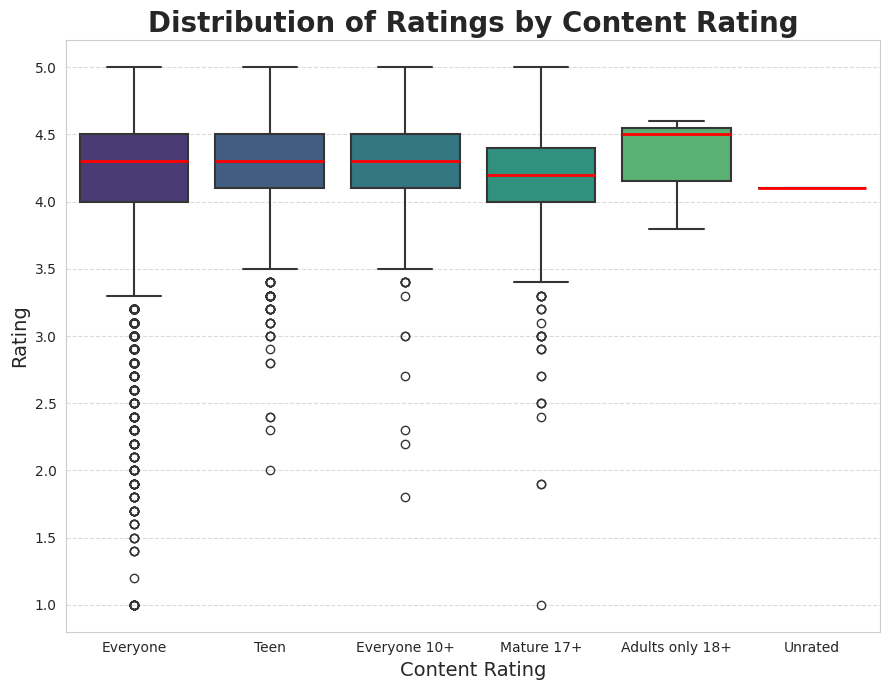

In [111]:
plt.figure(figsize=(9, 7))
sns.boxplot(x="Content Rating", y="Rating", data=df, palette='viridis', linewidth=1.5, medianprops={'color': 'red', 'linewidth': 2})
plt.title("Distribution of Ratings by Content Rating", size=20, fontweight='bold')
plt.xlabel("Content Rating", size=14)
plt.ylabel("Rating", size=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

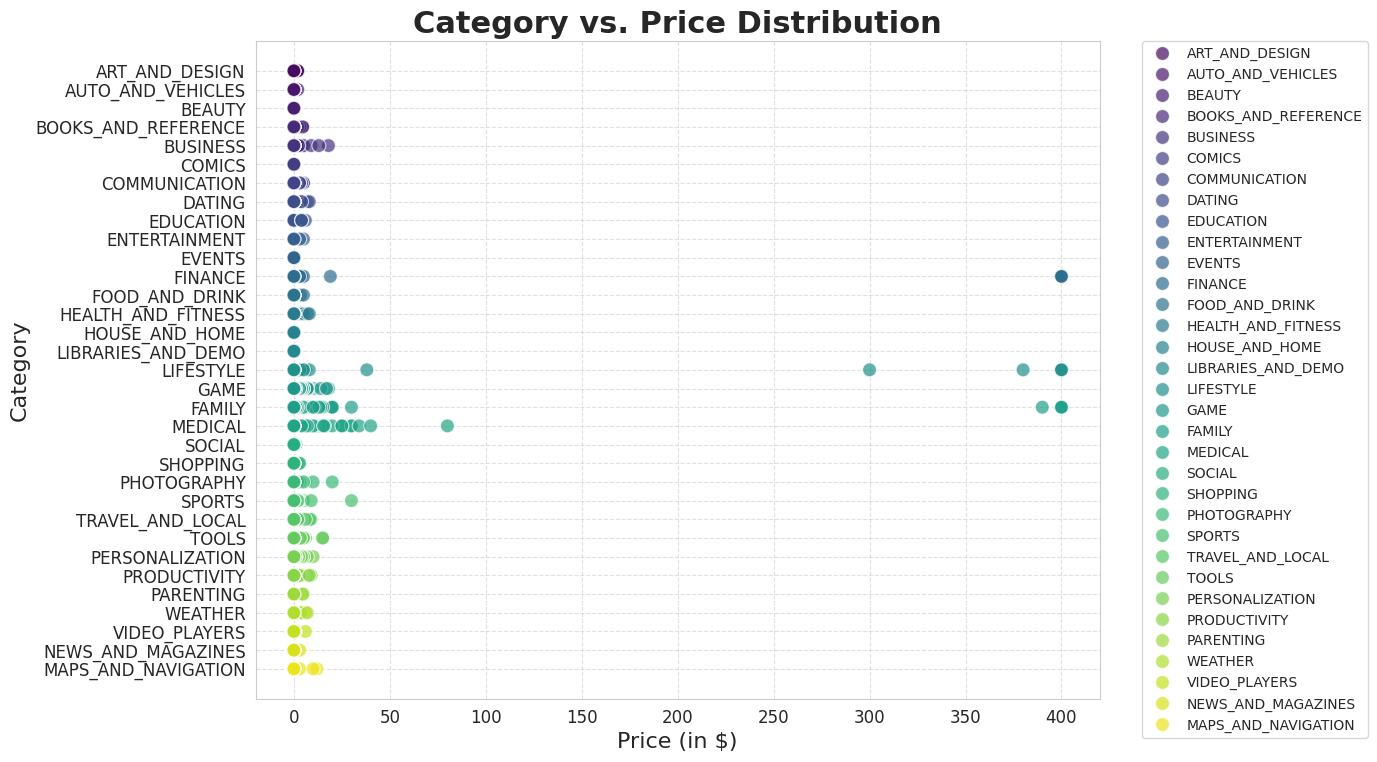

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
sns.scatterplot(data = df, y = "Category", x = "Price", hue="Category", palette="viridis", s=100, alpha=0.7)
plt.title("Category vs. Price Distribution", size=22, fontweight='bold')
plt.xlabel("Price (in $)", size=16)
plt.ylabel("Category", size=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

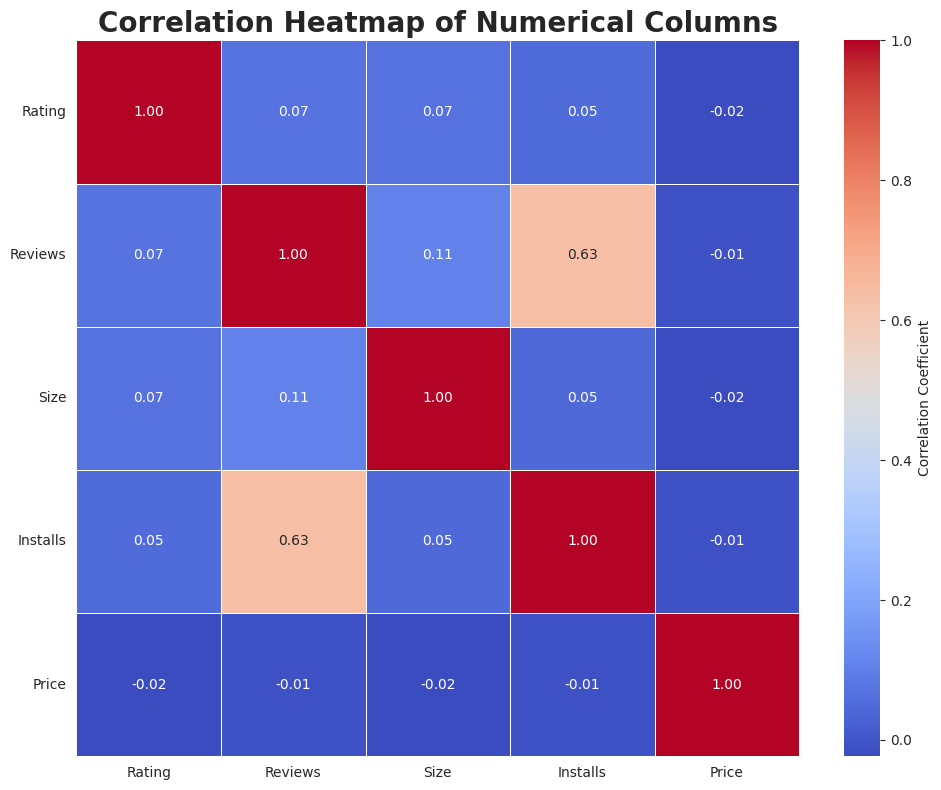

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, linewidths=.5, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap of Numerical Columns", size=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

The number of Installs and number of reviews have the best correlation!

Text(0.5, 1.0, 'Histogram with the KDE for the rating column ')

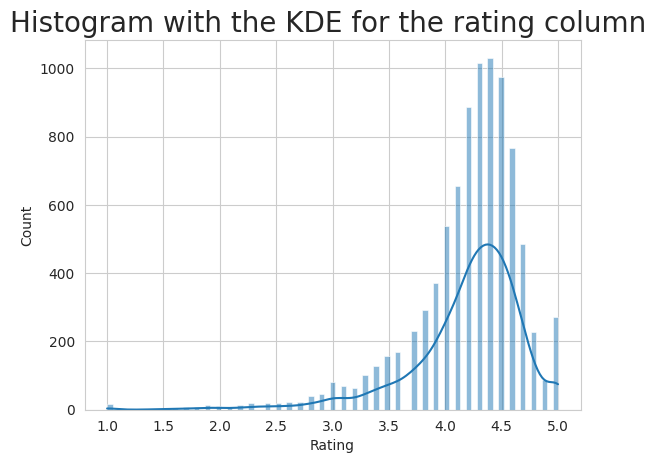

In [115]:
sns.histplot(df["Rating"], kde = True)
plt.title("Histogram with the KDE for the rating column ", size=20,)

/tmp/ipython-input-1613664921.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Installs', data=avg_installs_by_type, palette='pastel')


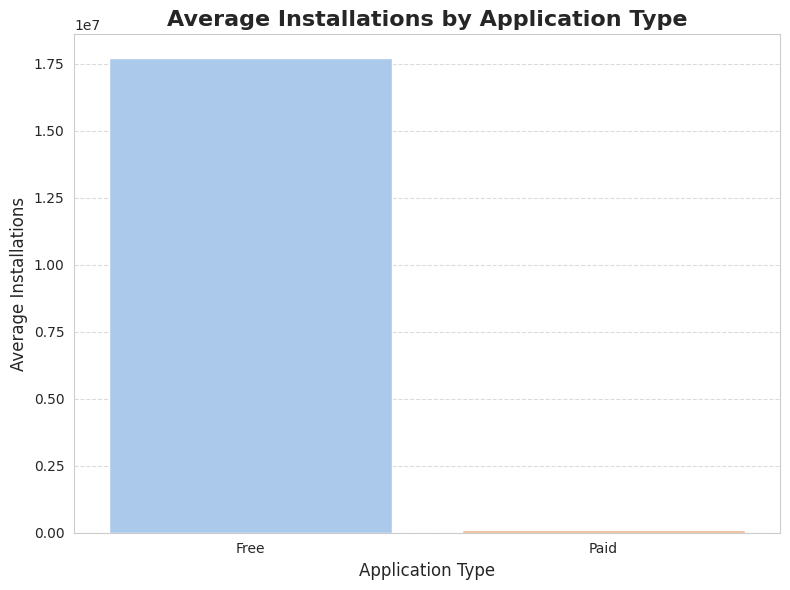

In [116]:
sns.set_style("whitegrid")

avg_installs_by_type = df.groupby('Type')['Installs'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Installs', data=avg_installs_by_type, palette='pastel')
plt.title('Average Installations by Application Type', fontsize=16, fontweight='bold')
plt.xlabel('Application Type', fontsize=12)
plt.ylabel('Average Installations', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

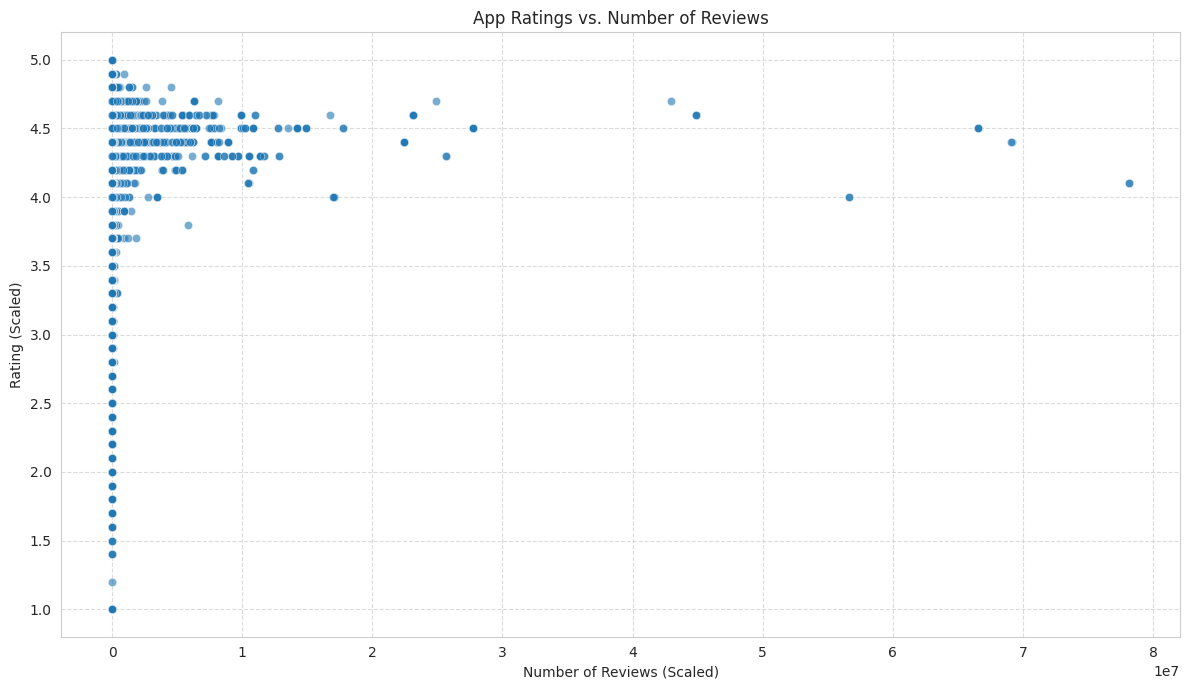

In [117]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Reviews', y='Rating', data=df, alpha=0.6)
plt.title('App Ratings vs. Number of Reviews')
plt.xlabel('Number of Reviews (Scaled)')
plt.ylabel('Rating (Scaled)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Applications with more reviews have higher ratings!

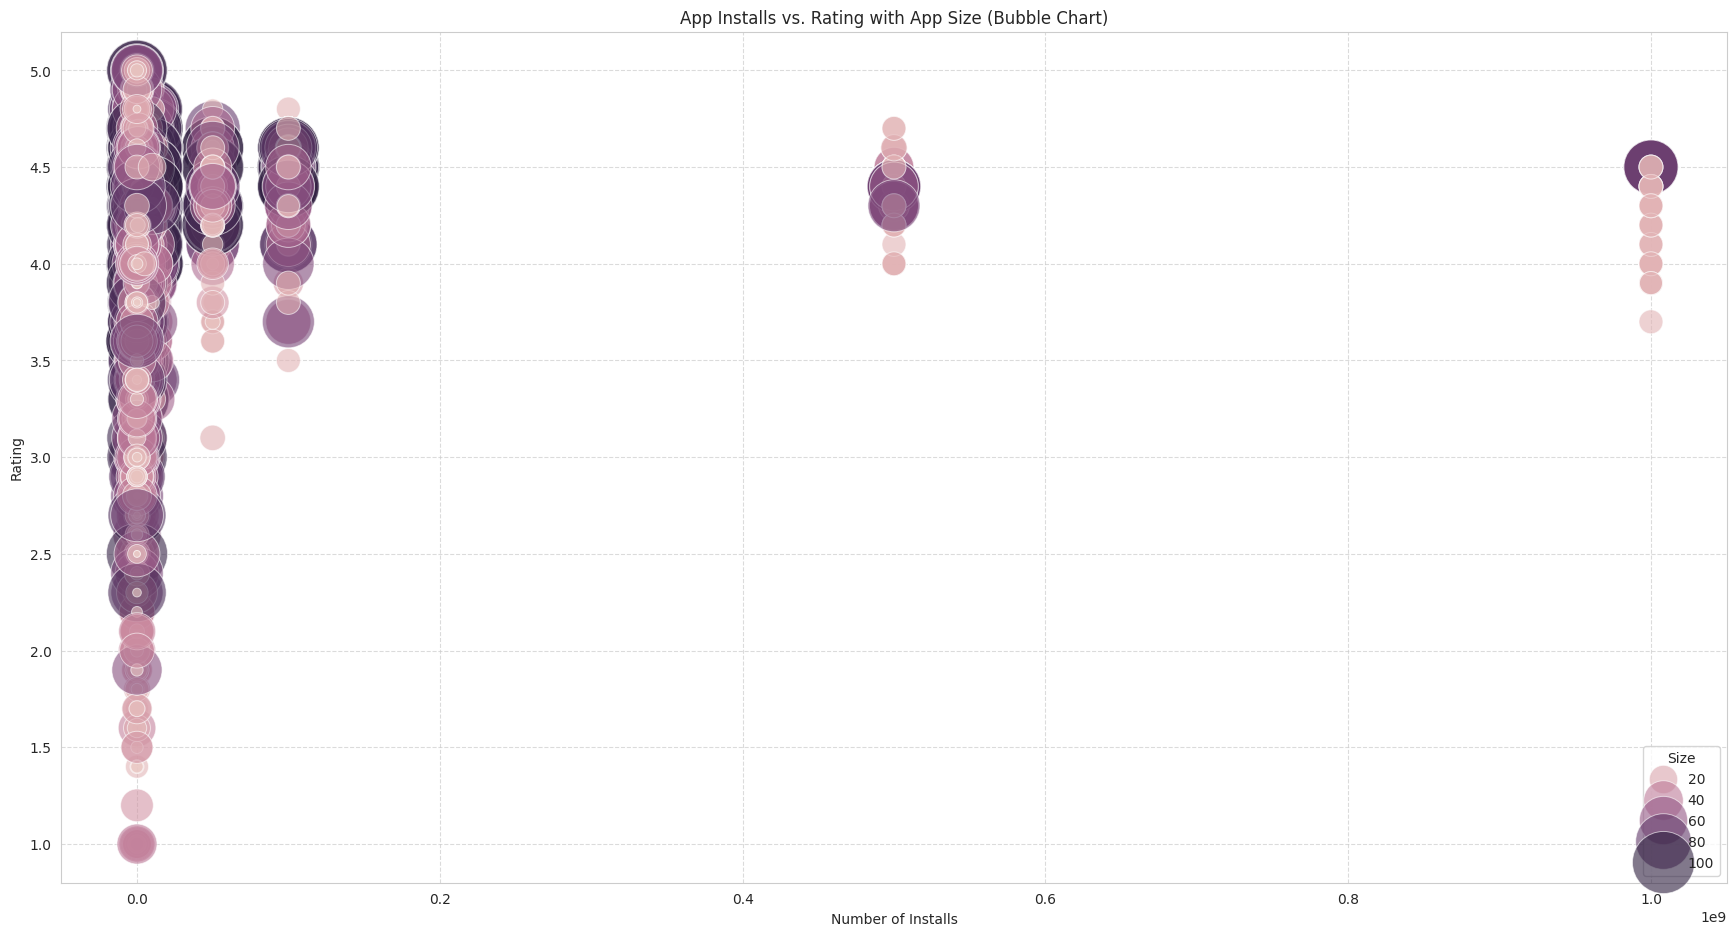

In [119]:
plt.figure(figsize=(18, 10))
sns.scatterplot(x='Installs', y='Rating', size='Size', data=df, sizes=(20, 2000), alpha=0.6, hue='Size')
plt.title('App Installs vs. Rating with App Size (Bubble Chart)')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(pad=3.0)
plt.show()

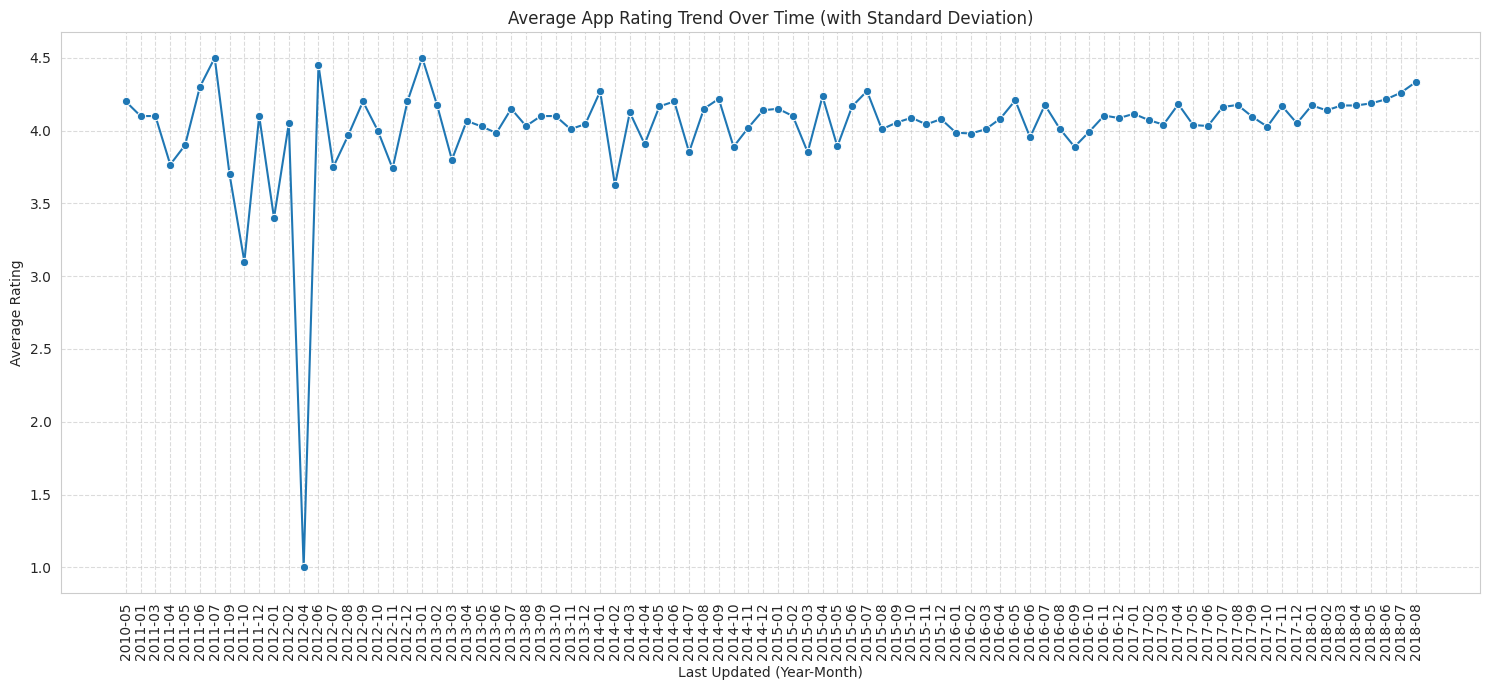

In [120]:
df['YearMonth'] = df['Last Updated'].dt.to_period('M')

rating_trend = df.groupby('YearMonth')['Rating'].mean().reset_index()
rating_trend['YearMonth'] = rating_trend['YearMonth'].astype(str) # Convert Period to string for plotting

plt.figure(figsize=(15, 7))
sns.lineplot(x='YearMonth', y='Rating', data=rating_trend, marker='o', errorbar='sd')
plt.title('Average App Rating Trend Over Time (with Standard Deviation)')
plt.xlabel('Last Updated (Year-Month)')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **3. Feature Engineering**

---



In [121]:
df['Updated_Year'] = df['Last Updated'].dt.year
df['Updated_Month'] = df['Last Updated'].dt.month
df['Updated_Day'] = df['Last Updated'].dt.day
df['Updated_DayOfWeek'] = df['Last Updated'].dt.dayofweek

df['App_Name_Length'] = df['App'].apply(len)

# Handle potential division by zero by replacing 0 installs with 1 to avoid inf/NaN
df['Installs_cleaned'] = df['Installs'].replace(0, 1)
df['Reviews_per_Install'] = df['Reviews'] / df['Installs_cleaned']

# Drop the temporary 'Installs_cleaned' column
df.drop('Installs_cleaned', axis=1, inplace=True)


print("New features added to df:")
print(df[['Last Updated', 'Updated_Year', 'Updated_Month', 'Updated_Day', 'Updated_DayOfWeek', 'App_Name_Length', 'Reviews_per_Install']].head())
print("Updated df info:")
print(df.info())

New features added to df:
  Last Updated  Updated_Year  Updated_Month  Updated_Day  Updated_DayOfWeek  \
0   2018-01-07          2018              1            7                  6   
1   2018-01-15          2018              1           15                  0   
2   2018-08-01          2018              8            1                  2   
3   2018-06-08          2018              6            8                  4   
4   2018-06-20          2018              6           20                  2   

   App_Name_Length  Reviews_per_Install  
0               46             0.015900  
1               19             0.001934  
2               50             0.017502  
3               21             0.004313  
4               37             0.009670  
Updated df info:
<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 0 to 10840
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App     

### **3.2 Feature Selection using Mutual Information**

---



In [122]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import numpy as np

df_features = df_encoded.copy()

y = df_features['Rating']

# Drop 'App', 'Last Updated', 'Current Ver', 'Android Ver' and target 'Rating' from features X
X = df_features.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver', 'Rating'], errors='ignore')

# Ensure all columns in X are numeric. Convert boolean columns to int.
X = X.astype(float)

# Handle any NaN values that might have been introduced by type conversion or if any remained (shouldn't if previous steps were thorough)
X.fillna(X.median(), inplace=True)

selector = SelectKBest(mutual_info_regression, k=20)
selector.fit(X, y)

# Get the selected features
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()

print(f"Top 20 features selected by Mutual Information:")
print(selected_features)

Top 20 features selected by Mutual Information:
['Reviews', 'Size', 'Installs', 'Category_BUSINESS', 'Category_COMMUNICATION', 'Category_EVENTS', 'Category_HEALTH_AND_FITNESS', 'Category_MAPS_AND_NAVIGATION', 'Category_NEWS_AND_MAGAZINES', 'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY', 'Genres_Art & Design', 'Genres_Books & Reference', 'Genres_Casino', 'Genres_Communication', 'Genres_Food & Drink', 'Genres_Personalization', 'Genres_Simulation', 'Genres_Tools', 'Genres_Trivia']


### **3.3 PCA**

---



In [124]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

engineered_features = ['Updated_Year', 'Updated_Month', 'Updated_Day', 'Updated_DayOfWeek', 'App_Name_Length', 'Reviews_per_Install']

for col in engineered_features:
    df_encoded[col] = df[col]

scaler_new_features = StandardScaler()
df_encoded[engineered_features] = scaler_new_features.fit_transform(df_encoded[engineered_features])


# Prepare features for PCA
# Exclude 'App', 'Last Updated', 'Current Ver', 'Android Ver', 'YearMonth' (object types or already handled)
# Exclude 'Rating' as it's typically the target variable, not a feature to be reduced.

# Identify all numerical/boolean columns from df_encoded for PCA, explicitly excluding 'Last Updated'
pca_features_cols = [col for col in df_encoded.columns if df_encoded[col].dtype != 'object' and col != 'Rating' and col != 'Last Updated']

X_pca = df_encoded[pca_features_cols].copy() # Explicitly create a copy to avoid SettingWithCopyWarning

# Handle any remaining NaNs in X_pca just in case (should be clean from previous steps)
X_pca.fillna(X_pca.median(), inplace=True)

# Apply PCA
pca = PCA(n_components=2)
X_pca_reduced = pca.fit_transform(X_pca)

df_encoded['PC1'] = X_pca_reduced[:, 0]
df_encoded['PC2'] = X_pca_reduced[:, 1]

print("Explained Variance Ratio for each principal component:")
print(pca.explained_variance_ratio_)
print(f"Total Explained Variance: {pca.explained_variance_ratio_.sum():.2f}")

print("First 5 rows of DataFrame with new principal components:")
print(df_encoded[['PC1', 'PC2']].head())
print("Updated df_encoded info:")
print(df_encoded.info())

Explained Variance Ratio for each principal component:
[0.13825478 0.10342155]
Total Explained Variance: 0.24
First 5 rows of DataFrame with new principal components:
        PC1       PC2
0 -0.430619  1.487822
1 -0.296431  1.233478
2 -0.140425  0.505066
3  0.383494  0.242672
4 -0.420531  0.621840
Updated df_encoded info:
<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 0 to 10840
Columns: 105 entries, App to PC2
dtypes: bool(88), datetime64[ns](1), float64(13), object(3)
memory usage: 2.0+ MB
None


### **3.4 When is feature engineering a nice-to-have option, and when is it a must-have?**

---

1.  **Definition of Feature Engineering:**
    Feature engineering is the process of using domain knowledge to extract new features from raw data. These new features are often crucial for improving the performance of machine learning models and enhancing the interpretability of the data. It involves transforming existing features, combining multiple features, or creating entirely new ones to better represent the underlying patterns in the data for a given predictive task.

2.  **"Nice-to-have" Scenarios:**
    Feature engineering can be considered a "nice-to-have" option in situations where a machine learning model already performs reasonably well on the raw or minimally processed data. In these cases, the existing features are sufficiently informative for the task at hand, and adding new, engineered features might provide incremental improvements but are not critical for achieving acceptable performance. The benefits are supplementary because the model can still learn meaningful patterns without extensive feature engineering, perhaps due to the simplicity of the problem, the richness of the raw data, or the use of powerful, complex models (like deep learning models) that can implicitly learn hierarchical features.

    *   **Example (related to app store data):** If a simple linear regression model can already predict app ratings with satisfactory accuracy using only 'Reviews', 'Installs', and 'Price', then creating features like 'Reviews_per_Install' or 'App_Name_Length' might only offer a slight boost in performance. The model is already effective enough, and these new features just make it a bit better.

3.  **"Must-have" Scenarios:**
    Feature engineering becomes a "must-have" when the raw data alone is insufficient for the machine learning model to achieve acceptable performance or extract meaningful insights. This often happens when the underlying relationships in the data are complex, hidden, or not directly representable by the raw features. In such cases, carefully crafted features can transform the data into a format that makes these relationships explicit and easier for the model to learn. Without these engineered features, the model might struggle to converge, produce poor predictions, or fail to generalize to new, unseen data.

    *   **Example (related to app store data):** Imagine trying to predict app ratings (`Rating`) or success solely based on 'App Name' and 'Last Updated' as raw strings. A model would struggle significantly. However, by feature engineering 'App_Name_Length' to capture a proxy for app complexity/description, or extracting 'Updated_Year', 'Updated_Month', 'Updated_DayOfWeek' from 'Last Updated' to capture seasonality or recency trends, these transformed features become absolutely essential. Without them, the model would perform poorly because it cannot understand temporal patterns or the descriptive aspects of the app name from raw text. Similarly, predicting app success might necessitate features like the ratio of positive to negative reviews, or the rate of install growth, which are not directly available in the raw data but must be engineered.

## **4. Web Scraping**

---

Since the code below to download the website html does not work, I use the downloaded html file :)

In [132]:
!pip install selenium webdriver-manager beautifulsoup4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 31.9 MB/s eta 0:00:00


In [134]:
import requests
from bs4 import BeautifulSoup

URL = "https://bama.ir/car/samand?year=1385"

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                  "(KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
}

response = requests.get(URL, headers=HEADERS)

if response.status_code != 200:
    print("Failed to fetch page:", response.status_code)
    exit()

soup = BeautifulSoup(response.text, "html.parser")

# Find the main container
container = soup.select_one("div.bama-adlist-container")

if not container:
    print("Could not find .bama-adlist-container")
    exit()

items = container.select("div.bama-ad-holder")

# Take the first 50 only
items = items[:50]

links = []

for item in items:
    a_tag = item.find("a")
    if a_tag and a_tag.has_attr("href"):
        links.append(a_tag["href"])

print("Found", len(links), "links:")
for link in links:
    print(link)


KeyboardInterrupt: 